# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error



import torch
import torch.nn as nn
import torch.optim as optim

# Import Data

In [2]:
#Import dataframe
url = 'https://drive.google.com/uc?export=download&id=1JPcN9Pd8KMMMflNUAJYUyySR8WjC26ZR'
laptop = pd.read_csv(url)

In [3]:
# Inspect data
laptop.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Data Cleaning

A clean dataset ensures high-quality prediction. Therefore, rather than immediately jumping into crafting complex machine learning models, it is essential to preprocess the data to enhance its effectiveness and clarity.

The dimensions of the dataframe are checked, providing insight into the number of rows and columns.

In [4]:
# Check dataframe dimension
laptop.shape

(1275, 23)

The column names are then inspected to understand the variables included in the dataset. The `info() method` is used to assess the data types of each column, identifying any potential inconsistencies or the need for conversion.

In [5]:
# Check data columns
laptop.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [6]:
# Check input type
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Missing values are evaluated with `isnull().sum()`, confirming that there are no missing values in any of the columns.

In [7]:
# Check missing values
laptop.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


Additionally, duplicated rows are checked to ensure the data's uniqueness. If there exist duplicated samples, only one unique sample will be keep in the dataframe.

In [8]:
# Check for duplication
laptop.duplicated().sum()

0

Finally, the columns are categorized into numerical and categorical groups to facilitate targeted analysis.

In [9]:
# Define numerical column names
numeric_columns = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW',
                   'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

In [10]:
# Define categorical column names
categorical_columns = ['Company', 'Product', 'TypeName', 'OS', 'Screen',
                       'Touchscreen', 'IPSpanel', 'RetinaDisplay',
                       'CPU_company', 'CPU_model', 'PrimaryStorageType',
                       'SecondaryStorageType', 'GPU_company','GPU_model']

# Exploratory Data Analysis

EDA helps identify important features that can inform the selection of relevant variables for modeling, as well as highlight potential topics or trends that can guide further analysis.

The pair plot is used to visualize the relationships between numerical variables in the dataset, with the "TypeName" column as the hue.

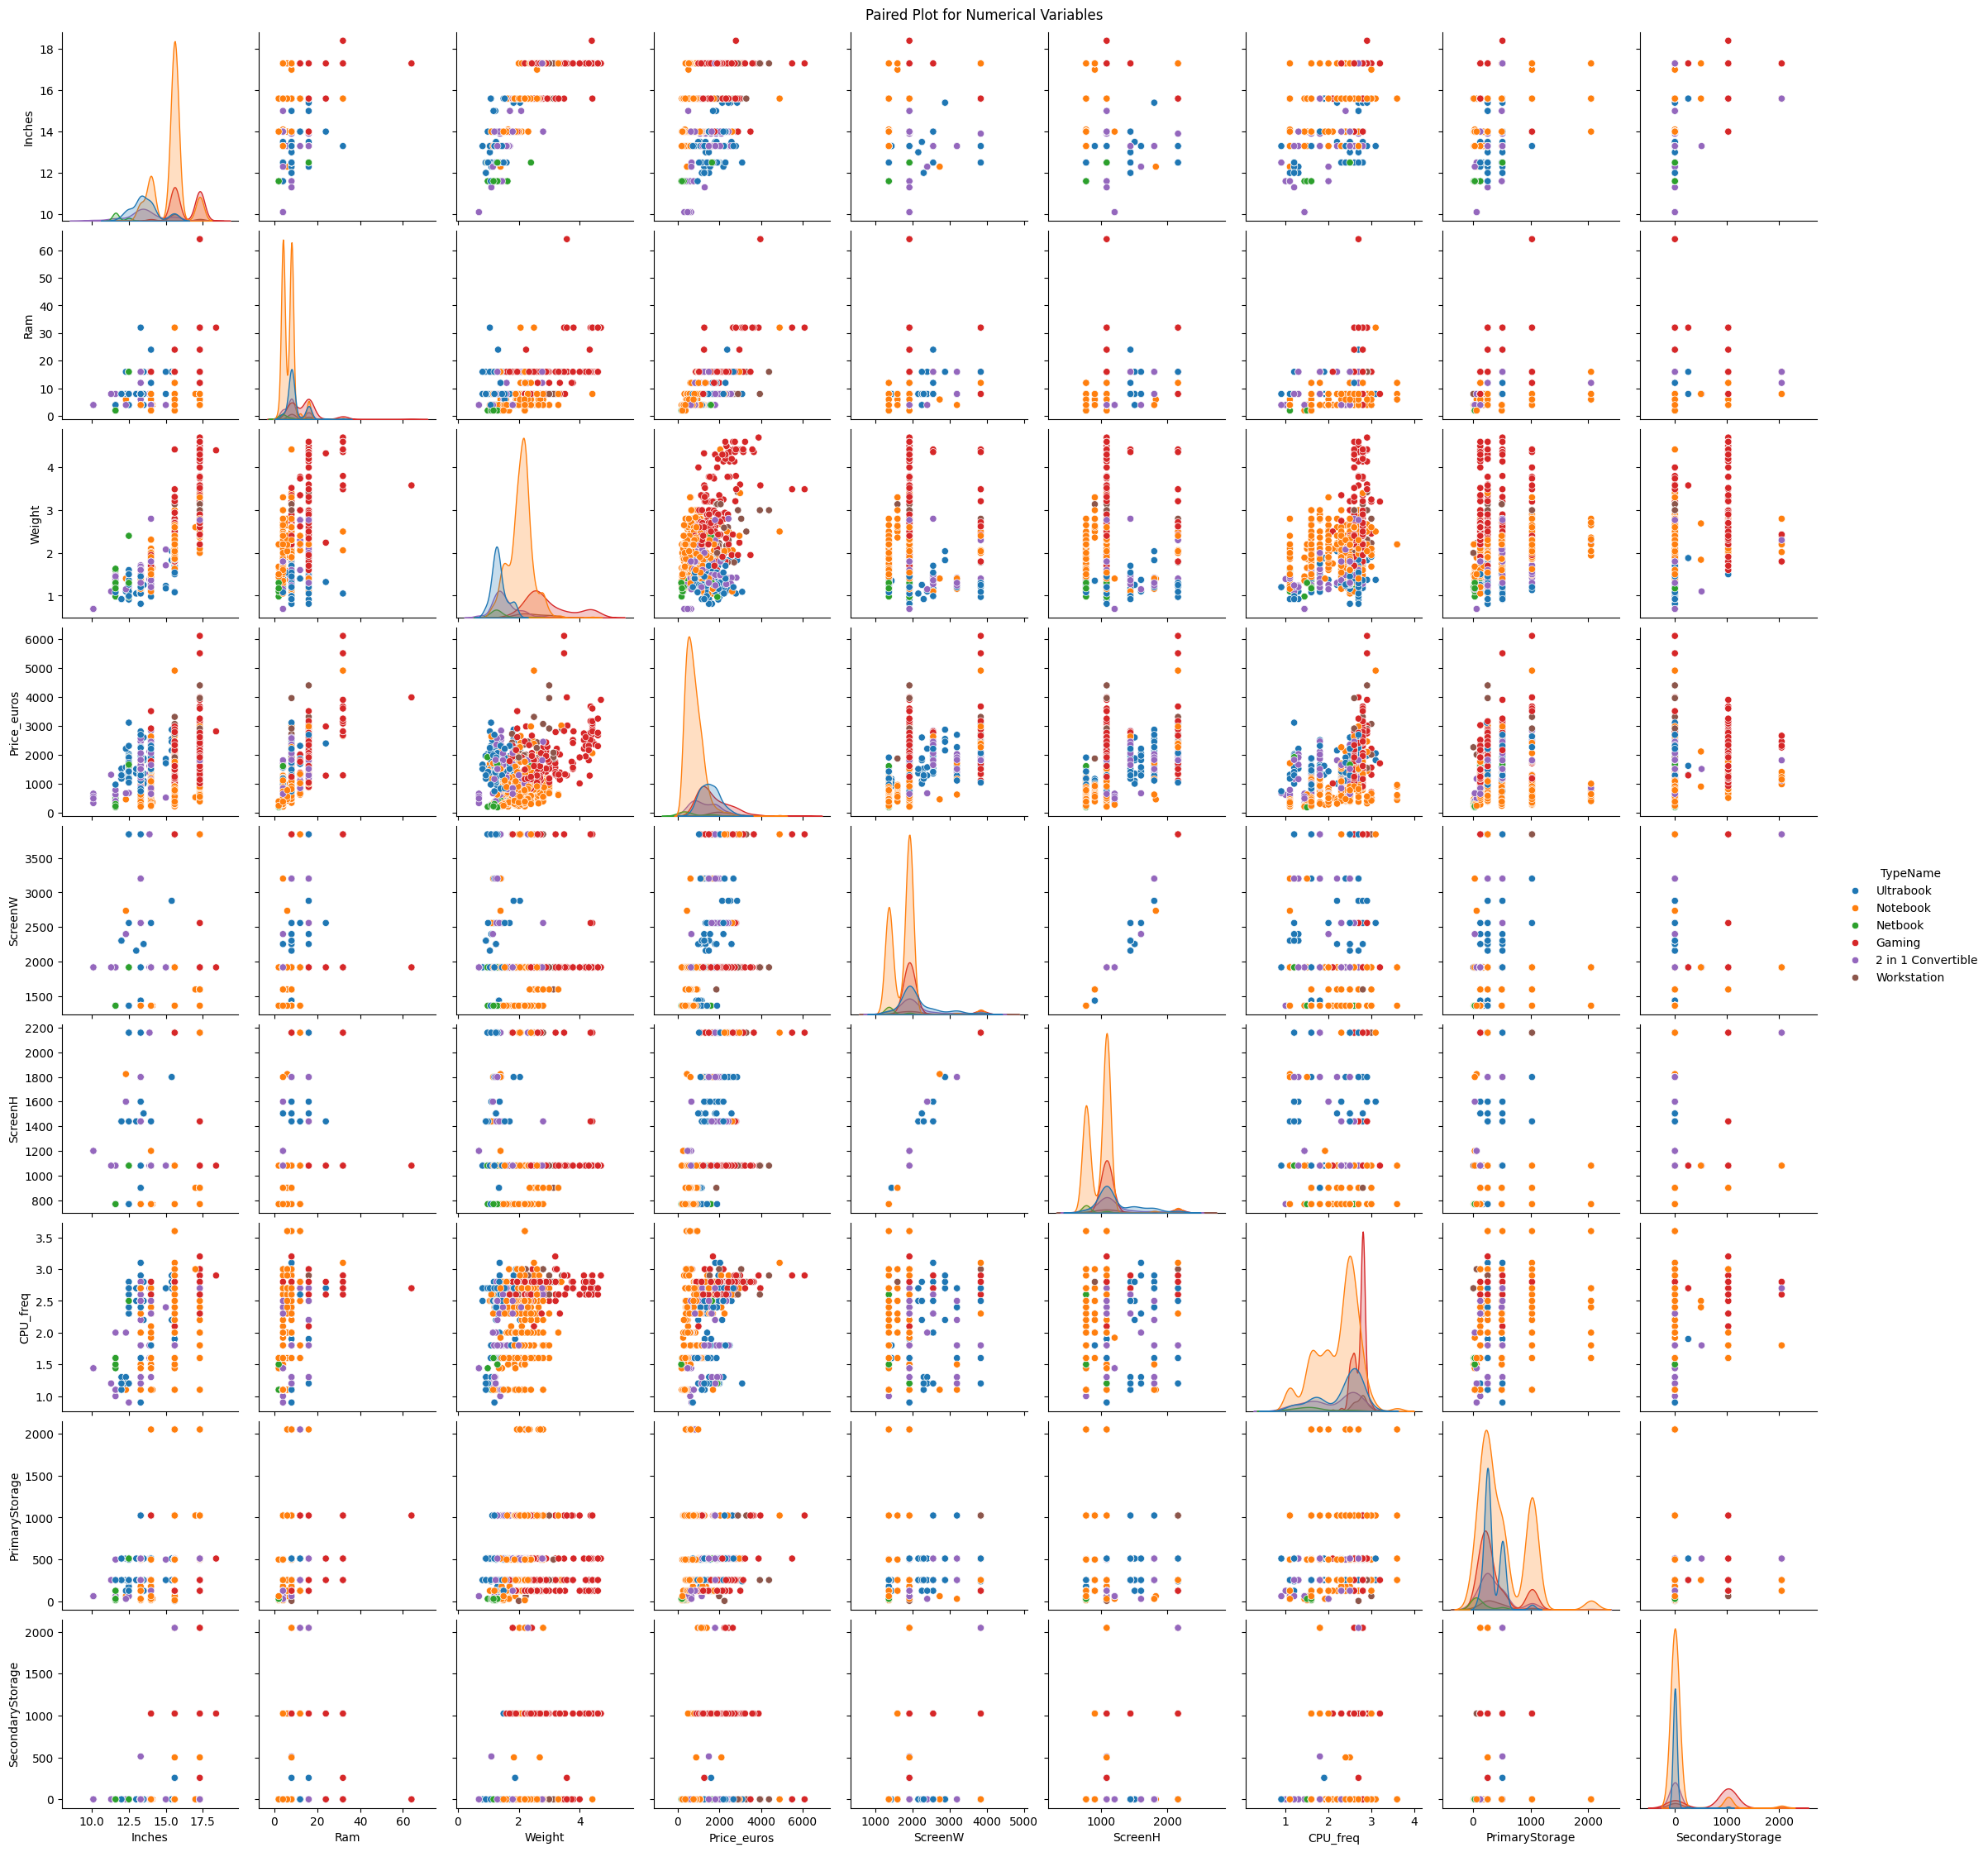

In [11]:
pair_plot = sns.pairplot(laptop, hue="TypeName")
pair_plot.fig.suptitle("Paired Plot for Numerical Variables", y = 1)
plt.show()

The resulting plot does not show any obvious relationship between price and the numerical variables, suggesting that price alone may not be easily predicted based on these features. Predicting precise laptop prices requires a high-level model capable of capturing complex relationships, which might involve non-linear interactions or additional features that are not immediately apparent in the numerical data. This limitation prevents a straightforward exploration of predicting laptop prices. As a result, the focus shifts to predicting laptop type, which appears to offer a more feasible analytical pathway.

Next, we explore the relationship between the laptop type and numerical columns by grouping the data by "TypeName" and calculating the mean of the numerical columns.

In [12]:
# Explore relationship between type vs. numeric columns
grouped_means = laptop.groupby('TypeName')[numeric_columns].mean().round(2)
grouped_means

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
TypeName,,,,,,,,,
2 in 1 Convertible,13.61,8.62,1.55,1289.71,2113.44,1195.01,2.12,377.68,39.38
Gaming,16.35,14.05,2.95,1731.38,2048.00,1152.00,2.72,369.64,765.50
Netbook,11.83,4.87,1.32,673.38,1462.35,822.26,1.68,132.87,0.00
Notebook,15.33,6.54,2.06,788.74,1752.29,986.10,2.21,518.52,82.52
Ultrabook,13.60,9.45,1.34,1556.68,2164.43,1245.90,2.30,339.40,13.20
Workstation,15.95,10.48,2.47,2280.36,2173.79,1222.76,2.75,389.66,70.62


The means are then scaled for better comparison, as there are significant differences in the values of the numerical features. Scaling the data helps eliminate the dominance of large values in the analysis and ensures a more balanced visual comparison across different features.

In [13]:
# Scaled numerical data for better comparison
scaler = StandardScaler()
scaled_means = pd.DataFrame(scaler.fit_transform(grouped_means),
                            columns=grouped_means.columns,
                            index=grouped_means.index)
scaled_means

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
TypeName,,,,,,,,,
2 in 1 Convertible,-0.529395,-0.130721,-0.656116,-0.176016,0.616690,0.599843,-0.482697,0.201849,-0.451146
Gaming,1.207780,1.729052,1.649898,0.625451,0.366119,0.316350,1.156650,0.131448,2.223247
Netbook,-1.657924,-1.415094,-1.034961,-1.294426,-1.876351,-1.857071,-1.684884,-1.941802,-0.596188
Notebook,0.561095,-0.843120,0.183932,-1.085091,-0.766163,-0.777149,-0.236795,1.435099,-0.292256
Ultrabook,-0.535735,0.153554,-1.002018,0.308435,0.811932,0.935275,0.009107,-0.133345,-0.547571
Workstation,0.954178,0.506329,0.859265,1.621646,0.847772,0.782752,1.238618,0.306751,-0.336085


Following this, a side-by-side bar plot is created to visualize the scaled mean values of the numerical columns for each laptop type. The plot allows for a direct comparison of how the different types of laptops vary in terms of their numerical characteristics.

In [14]:
# Create side-by-side bar plot for comparison
custom_colors = ['#f57c6e', '#f2b56f', '#fae69e', '#c5e384', '#8bc34a',
                 '#88d8db', '#71b7ed', '#b8aeeb', '#f2a7da']
fig = go.Figure()
for i, column in enumerate(scaled_means.columns):
    fig.add_trace(go.Bar(x = scaled_means.index,
                         y = scaled_means[column],
                         name = column,
                         marker_color = custom_colors[i % len(custom_colors)]))

# Customize layout
fig.update_layout(title = "Scaled Mean of Numeric Columns by Type",
                  title_x = 0.5,
                  xaxis_title = "TypeName",
                  yaxis_title = "Mean Values",
                  barmode = 'group',
                  xaxis = dict(tickangle=45),
                  legend_title = "Numeric Columns",
                  width = 700,
                  height = 500)

fig.show()

In [15]:
# Explore price for each laptoptype
laptop.groupby(['TypeName'])['Price_euros'].mean().round(2).sort_values(ascending=False)

,Price_euros
TypeName,
Workstation,2280.36
Gaming,1731.38
Ultrabook,1556.68
2 in 1 Convertible,1289.71
Notebook,788.74
Netbook,673.38


The relationship between laptop type and price is explored by calculating the average price for each laptop type.

In [16]:
# Define binary separation
high_price_type = ['Workstation', 'Gaming', 'Ultrabook']
low_price_type = ['2 in 1 Convertible', 'Notebook', 'Netbook']

The resulting values are sorted in descending order to reveal that high-priced laptop types, such as Workstation, Gaming, and Ultrabook, have significantly higher average prices compared to lower-priced types like 2 in 1 Convertible, Notebook, and Netbook. Based on this price distribution, the laptop types are classified into two groups: high-price types (Workstation, Gaming, Ultrabook) and low-price types (2 in 1 Convertible, Notebook, Netbook). This distinction provides a foundation for using logistic regression to further explore the relationship between laptop type and other features.

The relationship between categorical features and laptop type is explored through statistical testing and visualizations.

In [17]:
# Define feasible categorical columns
categorical_explore = ['OS', 'Screen', 'Touchscreen','IPSpanel',
                      'RetinaDisplay', 'CPU_company', 'PrimaryStorageType',
                      'SecondaryStorageType', 'GPU_company']

The Chi-Square test of independence was performed for each categorical variable to assess its correlation with the target variable, laptop type.

In [18]:
# Loop over the list of categorical features and perform the Chi-Square test for each
for feature in categorical_explore:
    # Create a contingency table
    contingency_table = pd.crosstab(laptop[feature], laptop['TypeName'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Print the results
    print(f'Feature: {feature}')
    print(f'Chi-Square Statistic: {chi2}')
    print(f'P-value: {p_value}')
    print('--------')

Feature: OS
Chi-Square Statistic: 423.9113948593449
P-value: 1.2674790160673034e-65
--------
Feature: Screen
Chi-Square Statistic: 242.49352450447054
P-value: 4.351535922700308e-43
--------
Feature: Touchscreen
Chi-Square Statistic: 769.2035283570033
P-value: 5.3106722539563986e-164
--------
Feature: IPSpanel
Chi-Square Statistic: 126.67463103141569
P-value: 1.207954905142857e-25
--------
Feature: RetinaDisplay
Chi-Square Statistic: 83.18427790715226
P-value: 1.8080507980800385e-16
--------
Feature: CPU_company
Chi-Square Statistic: 39.47411795836696
P-value: 2.0965450168795287e-05
--------
Feature: PrimaryStorageType
Chi-Square Statistic: 313.97173009725634
P-value: 6.93597844651178e-58
--------
Feature: SecondaryStorageType
Chi-Square Statistic: 588.5810227275862
P-value: 9.458748089490493e-116
--------
Feature: GPU_company
Chi-Square Statistic: 671.3482543471513
P-value: 2.3625361706290534e-133
--------


The results reveal a strong relationship between categorical variables and laptop type, with low p-values indicating significant associations.

Histograms were also generated to visualize the distribution of each categorical feature by laptop type, further illustrating these relationships.

In [19]:
for column in categorical_explore:
    unique_values = laptop[column].unique()
    color_map = {value: custom_colors[i % len(custom_colors)] for i, value in enumerate(unique_values)}
    fig = px.histogram(laptop,
                       x = 'TypeName',
                       color = column,
                       title = f'Distribution of {column} by Laptop Type',
                       labels = {'TypeName': 'Laptop Type', column: column},
                       category_orders = {'TypeName': laptop['TypeName'].unique()},
                       color_discrete_map = color_map)

    # Customize layout
    fig.update_layout(xaxis_title = 'Laptop Type',
                      yaxis_title = 'Count',
                      xaxis = dict(tickangle=45),
                      title_x = 0.5,
                      legend_title = column,
                      barmode = 'group',
                      width = 700,
                      height = 500)

    # Show the plot
    fig.show()

Given the significant correlation between categorical features and laptop type, categorical variables will be included in future analyses using one-hot encoding to transform them into numerical format, making them suitable for machine learning models.

# Feature Selection

In this section, the focus is on preparing the dataset for Principal Component Analysis (PCA) to reduce dimensionality while retaining as much variance as possible. The first step involves separating the `TypeName` column, which will be used as the target variable in future predictive models, and isolating the numerical columns that will undergo PCA.

In [20]:
# Separate the TypeName column
typename_column = laptop[['TypeName']]

Then, categorical features are one-hot encoded using OneHotEncoder. This transformation converts the categorical variables into a numerical format, where each unique category within a feature is represented by a binary column.

In [21]:
# Ont-hot encode all the categorical features
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(laptop[categorical_explore])

After encoding, all categorical columns are combined with the scaled numerical columns. The numerical features are scaled using StandardScaler to standardize their range, ensuring that each feature contributes equally to the analysis. The scaled categorical and numerical data are then concatenated into a single dataframe, which is prepared for PCA.

In [22]:
# Apply scaling to the numerical dataset
scaled_numerical_laptop = scaler.fit_transform(laptop[numeric_columns])
scaled_laptop = pd.concat([pd.DataFrame(scaled_numerical_laptop), pd.DataFrame(categorical_encoded)], axis=1)
scaled_laptop = scaled_laptop.astype('float64')
scaled_laptop.head()

,0,1,2,3,4,5,6,7,8,0,...,24,25,26,27,28,29,30,31,32,33
0,-1.205746,-0.086499,-1.002380,0.292259,1.338239,1.853934,-0.005918,-0.866236,-0.423449,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.205746,-0.086499,-1.047227,-0.336954,-0.932863,-0.612830,-0.998674,-0.866236,-0.423449,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.403873,-0.086499,-0.269871,-0.799410,0.040466,0.021481,0.391185,-0.515929,-0.423449,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.263906,1.483418,-0.314718,2.002178,1.987125,2.558724,0.788288,0.184684,-0.423449,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.205746,-0.086499,-1.002380,0.954536,1.338239,1.853934,1.582493,-0.515929,-0.423449,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


PCA is applied to the scaled dataset, and the proportion of variance explained by each principal component (PC) is calculated.

In [23]:
# Perform PCA for the scaled data
pca_U, pca_d, pca_V = np.linalg.svd(scaled_laptop)

In [24]:
# Calculate the proportion of variance explained by each PC
# and the cumulative variability explained by each PC
prop_var = np.square(pca_d) / sum(np.square(pca_d))
pca_summary = pd.DataFrame({"PC": 1 + np.arange(0, prop_var.shape[0]),
                            "variability_explained": prop_var.round(3),
                            "cumulative_variability_explained": prop_var.cumsum().round(4)})
pca_summary.head(15)

,PC,variability_explained,cumulative_variability_explained
0,1,0.342,0.3418
1,2,0.209,0.5504
2,3,0.141,0.6915
3,4,0.077,0.7689
4,5,0.049,0.8176
5,6,0.037,0.8545
6,7,0.026,0.8808
7,8,0.022,0.9028
8,9,0.017,0.9199
9,10,0.012,0.9322


A scree plot is generated to visualize the proportion of variance explained by each PC, and the elbow method is used to select the optimal number of components.

In [25]:
# Create a scree plot of the PCs against the percentage of variability
fig = px.line(pca_summary.head(10),
              x = 'PC',
              y = 'variability_explained',
              labels = {'variability_explained':'Proportion Explained'},
              title = 'Scree Plot of first 10 PCs')
fig.update_layout(title_x = 0.5, height = 500, width = 850)
fig

In this case, 5 PCs are chosen, as they explain 85.45% of the cumulative variability, capturing the most relevant information from the data.

In [26]:
# Create the PCA-transformed dataset
# Multiply the original data and the PCA loadings
pca_transformed_laptop = scaled_laptop@pca_V.T[:, :5]
pca_transformed_laptop = pd.DataFrame(pca_transformed_laptop)
# Change column name
pca_columns = ["PC" + str(1 + col) for col in pca_transformed_laptop.columns]
pca_transformed_laptop.columns = pca_columns
# Inspect PCA-transformed dataset
pca_transformed_laptop.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.767645,-0.410401,-2.897934,-0.082278,0.379079
1,-2.173980,2.015992,-0.891795,0.959393,-0.153730
2,-2.560884,0.352287,-0.085620,0.193460,-0.171018
3,-1.530750,-3.006057,-2.148272,-1.642140,-0.028868
4,-1.762579,-1.120197,-2.737083,-0.523663,-0.880003


The final dataset is created by combining the target variable, TypeName, with the principal components obtained from the PCA transformation. The resulting dataframe, final_laptop, includes both the target column and the transformed numerical features, which capture the most significant patterns in the data.

In [27]:
# Create a final dataset
final_laptop = pd.concat([typename_column, pca_transformed_laptop], axis = 1)
final_laptop.head()

,TypeName,PC1,PC2,PC3,PC4,PC5
0,Ultrabook,-1.767645,-0.410401,-2.897934,-0.082278,0.379079
1,Ultrabook,-2.173980,2.015992,-0.891795,0.959393,-0.153730
2,Notebook,-2.560884,0.352287,-0.085620,0.193460,-0.171018
3,Ultrabook,-1.530750,-3.006057,-2.148272,-1.642140,-0.028868
4,Ultrabook,-1.762579,-1.120197,-2.737083,-0.523663,-0.880003


In [28]:
# Encode the categorical target variable 'TypeName' using Label Encoding
label_encoder = LabelEncoder()
final_laptop['LabelEncodedType'] = label_encoder.fit_transform(final_laptop['TypeName'])
final_laptop.head()

,TypeName,PC1,PC2,PC3,PC4,PC5,LabelEncodedType
0,Ultrabook,-1.767645,-0.410401,-2.897934,-0.082278,0.379079,4
1,Ultrabook,-2.173980,2.015992,-0.891795,0.959393,-0.153730,4
2,Notebook,-2.560884,0.352287,-0.085620,0.193460,-0.171018,3
3,Ultrabook,-1.530750,-3.006057,-2.148272,-1.642140,-0.028868,4
4,Ultrabook,-1.762579,-1.120197,-2.737083,-0.523663,-0.880003,4


In [29]:
# Create a 'HighPriceType' column with boolean values indicating price range
final_laptop['HighPriceType'] = final_laptop['TypeName'].isin(high_price_type).astype(int)
final_laptop.head()

,TypeName,PC1,PC2,PC3,PC4,PC5,LabelEncodedType,HighPriceType
0,Ultrabook,-1.767645,-0.410401,-2.897934,-0.082278,0.379079,4,1
1,Ultrabook,-2.173980,2.015992,-0.891795,0.959393,-0.153730,4,1
2,Notebook,-2.560884,0.352287,-0.085620,0.193460,-0.171018,3,0
3,Ultrabook,-1.530750,-3.006057,-2.148272,-1.642140,-0.028868,4,1
4,Ultrabook,-1.762579,-1.120197,-2.737083,-0.523663,-0.880003,4,1


This final dataset is now ready for further analysis or modeling, with the reduced dimensionality making it more suitable for machine learning algorithms.

# Model Implementation

## Basic Machine Learning Models

### Split Data without Validation Data

The data was split into training and testing sets, allocating 80% of the data to training and 20% to testing when no validation set is required in the model.

In [30]:
# Splitting into train (80%) and testing (20%)
train, test = train_test_split(final_laptop, test_size = 0.2, random_state = 123)
print(f"Train set size: {len(train)}")
print(f"Test set size: {len(test)}")

Train set size: 1020
Test set size: 255


In [31]:
# Splitting into X and y
def split_data(df, y='TypeName'):
    # Ensure 'TypeName' or 'LabelEncodedType' exists in the dataframe
    if y not in df.columns:
        raise ValueError(f"Column '{y}' not found in DataFrame.")
    X = df[[f'PC{i}' for i in range(1, 6)]]
    y = df[y]
    return X, y

### Model 1: Linear Regression Model

The use of regression models, particularly linear regression, is not suitable for predicting categorical target variables like TypeName. Instead, the label encoding of TypeName facilitated this exploration by allowing regression models to process the target mathematically.

In [32]:
# Define training and testing set for linear regression model
X_train_lr, y_train_lr = split_data(train, y = 'LabelEncodedType')
X_test_lr, y_test_lr = split_data(test, y = 'LabelEncodedType')

Two regression models were utilized to explore the relationship between the principal components and the target labels:
1. A standard linear regression model
2. A Ridge regression model was implemented with an alpha value of 1

In [33]:
# Initialize the Linear Regression model
model_LS = LinearRegression()

# Initialize the Ridge regularization model(L2)
model_L2 = Ridge(alpha=1.0)

In [34]:
# Fit the linear regression model on training data
model_LS.fit(X_train_lr, y_train_lr)

LinearRegression()

In [35]:
# Fit the ridge model on training data
model_L2.fit(X_train_lr, y_train_lr)

Ridge()

In [36]:
# Make predictions on testing sets
y_train_pred_LS = model_LS.predict(X_train_lr)
y_test_pred_LS = model_LS.predict(X_test_lr)
y_train_pred_L2 = model_L2.predict(X_train_lr)
y_test_pred_L2 = model_L2.predict(X_test_lr)

In [37]:
print("Linear Coefficients:", model_LS.coef_)
print("Linear Intercept:", model_LS.intercept_)
print("Ridge Coefficients:", model_L2.coef_)
print("Ridge Intercept:", model_L2.intercept_)

Linear Coefficients: [-1.05128027e+00  1.37109586e-01 -5.83883755e-02 -1.93102811e-01
 -5.74059759e-04]
Linear Intercept: -0.01826370810992639
Ridge Coefficients: [-1.03423561  0.13770868 -0.05831647 -0.19249383 -0.0023729 ]
Ridge Intercept: 0.023895891710528527


In [38]:
def compute_metrics(y_true, y_pred):
    """
    Compute common regression metrics.

    Args:
    - y_true (array-like): True target values.
    - y_pred (array-like): Predicted target values.

    Returns:
    - dict: A dictionary of regression metrics.
    """
    metrics = {
        'Mean Absolute Error': round(mean_absolute_error(y_true, y_pred), 2),
        'Mean Squared Error': round(mean_squared_error(y_true, y_pred), 2),
        'Root Mean Squared Error': round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),
        'R2 Score': round(r2_score(y_true, y_pred), 2),
    }
    return metrics

In [39]:
# Metric evaluation for Linear Regression (Standard)
print("\nMetric Evaluation for Linear Regression Model: ")
train_metrics_LS = compute_metrics(y_train_lr, y_train_pred_LS)
print("Training Metrics:", train_metrics_LS)
val_metrics_LS = compute_metrics(y_test_lr, y_test_pred_LS)
print("Validation Metrics:", val_metrics_LS)

# Metric evaluation for L2 Regularized Regression (Ridge)
print("Metric Evaluation for L2 Regularized Regression Model: ")
train_metrics_L2 = compute_metrics(y_train_lr, y_train_pred_L2)
print("Training Metrics:", train_metrics_L2)
val_metrics_L2 = compute_metrics(y_test_lr, y_test_pred_L2)
print("Validation Metrics:", val_metrics_L2)


Metric Evaluation for Linear Regression Model: 
Training Metrics: {'Mean Absolute Error': 0.81, 'Mean Squared Error': 1.32, 'Root Mean Squared Error': 1.15, 'R2 Score': 0.16}
Validation Metrics: {'Mean Absolute Error': 0.83, 'Mean Squared Error': 1.38, 'Root Mean Squared Error': 1.17, 'R2 Score': 0.1}
Metric Evaluation for L2 Regularized Regression Model: 
Training Metrics: {'Mean Absolute Error': 0.81, 'Mean Squared Error': 1.32, 'Root Mean Squared Error': 1.15, 'R2 Score': 0.16}
Validation Metrics: {'Mean Absolute Error': 0.83, 'Mean Squared Error': 1.38, 'Root Mean Squared Error': 1.17, 'R2 Score': 0.1}


A scatter plot was created to visualize the relationship between the first principal component (PC1) and the label-encoded target variable. Fit lines for both models on the scatter plot:

In [40]:
# Scatter plot of the actual data
fig = px.scatter(x = X_train_lr['PC1'],
                 y = y_train_lr,
                 labels={'x': 'PC1', 'y': 'Label Encoded Type'},
                 title="Scatterplot with Linear and Ridge Regression Fit Lines")

# Adding the Ridge Regression (L2) fit line
fig.add_trace(
    go.Scatter(x = X_train_lr['PC1'],
               y = model_L2.intercept_ + X_train_lr['PC1'] * model_L2.coef_[0],
               mode='lines',
               name='Ridge (L2)',
               line={'dash': 'dash', 'color': 'blue'}))

# Adding the Linear Regression (LS) fit line
fig.add_trace(
    go.Scatter(x = X_train_lr['PC1'],
               y = model_LS.intercept_ + X_train_lr['PC1'] * model_LS.coef_[0],
               mode='lines',
               name='Linear Regression (LS)',
               line={'dash': 'solid', 'color': 'black'} ))

# Update the layout
fig.update_layout( height=700,
                  xaxis_title = 'PC1',
                  yaxis_title = 'Label Encoded Type',
                  showlegend=True,
                  title_x = 0.5)

fig.show()

The exploration highlights that both LS and L2 models produce nearly identical fits, demonstrating that regularization does not provide additional benefits in this case.

The poor fit of the regression models confirms their unsuitability for this analysis. Moreover, the inability to derive feature importance insights further supports transitioning to classification-based approaches.

### Model 2: Binary Logistic Regression Model

Logistic regression was used to predict a binary classification of laptop types based on price categories: high-priced versus low-priced laptops. The analysis utilized both unregularized logistic regression and logistic regression with L2 regularization to compare model performance.

In [41]:
# Define
X_train_blr, y_train_blr = split_data(train, y = 'HighPriceType')
X_test_blr, y_test_blr = split_data(test, y = 'HighPriceType')

In [42]:
# Logistic Regression without regularization
model_blr = LogisticRegression(penalty = None, solver='lbfgs', max_iter = 100, random_state = 123)
model_blr.fit(X_train_blr, y_train_blr)

LogisticRegression(penalty=None, random_state=123)

In [43]:
# Logistic Regression with L2 regularization
model_blr_reg = LogisticRegression(penalty = 'l2', solver='lbfgs', max_iter = 100, random_state = 123)
model_blr_reg.fit(X_train_blr, y_train_blr)

LogisticRegression(random_state=123)

In [44]:
# Predictions and performance for the model without regularization
y_pred_blr = model_blr.predict(X_test_blr)
accuracy_blr = accuracy_score(y_test_blr, y_pred_blr)
y_pred_reg = model_blr_reg.predict(X_test_blr)
accuracy_reg = accuracy_score(y_test_blr, y_pred_reg)

print("Logistic Regression without Regularization")
print(f"Accuracy: {accuracy_blr:.4f}")
print("\nClassification Report without Regularization:")
print(classification_report(y_test_blr, y_pred_blr))

print("\nLogistic Regression with L2 Regularization")
print(f"Accuracy: {accuracy_reg:.4f}")
print("\nClassification Report with L2 Regularization:")
print(classification_report(y_test_blr, y_pred_reg))

Logistic Regression without Regularization
Accuracy: 0.8235

Classification Report without Regularization:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       168
           1       0.84      0.60      0.70        87

    accuracy                           0.82       255
   macro avg       0.83      0.77      0.79       255
weighted avg       0.83      0.82      0.81       255


Logistic Regression with L2 Regularization
Accuracy: 0.8235

Classification Report with L2 Regularization:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       168
           1       0.84      0.60      0.70        87

    accuracy                           0.82       255
   macro avg       0.83      0.77      0.79       255
weighted avg       0.83      0.82      0.81       255



Regularization was not needed in this analysis, as the performance metrics were identical between the unregularized model and the L2-regularized model.

Data Insights:
1. The analysis confirmed distinct patterns in the dataset that enabled classification between high-priced and low-priced laptop types using logistic regression. However, the imbalance in recall values indicates that high-priced laptops were harder to predict.
2. Logistic regression results indirectly reflect that the principal components capture relevant information for price categorization, but direct feature importance cannot be derived.

## Ensemble Learning - Random Forest Classifier

In this section, a Random Forest Classifier model is defined to predict laptop types based on the features provided in the dataset. The model is then optimized using GridSearchCV, which searches for the best combination of hyperparameters by performing cross-validation.

In [45]:
X_train_rf, y_train_rf = split_data(train)
X_test_rf, y_test_rf = split_data(test)

In [46]:
# Define the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state = 123)

The parameter grid includes values for the number of estimators (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required for a split and a leaf node (min_samples_split, min_samples_leaf).

In [47]:
# Define parameter grid for GridSearchCV
param_grid = {'n_estimators': [29, 30, 31, 32],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': np.arange(2, 6),
              'min_samples_leaf': np.arange(1, 5)}

A 5-fold cross-validation strategy is applied during the grid search to ensure that the model is evaluated on different subsets of the training data, which helps in determining the most robust set of hyperparameters.

In [48]:
# Perform Grid Search with cross-validation
cv = KFold(n_splits = 5, shuffle = True, random_state = 123)
grid_search = GridSearchCV(estimator = rf_model,
                           param_grid = param_grid,
                           cv = cv,
                           scoring = 'accuracy',
                           verbose = 2,
                           n_jobs=-1)
grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5]),
                         'n_estimators': [29, 30, 31, 32]},
             scoring='accuracy', verbose=2)

Once the grid search is completed, the best model is obtained.

In [49]:
# Obtain the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Model:")
best_rf_model


Best Model:


RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=32,
                       random_state=123)

In [50]:
# Evaluate training accuracy
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_rf)
training_accuracy = accuracy_score(y_train_rf, y_train_pred)

print(f"Training Accuracy: {training_accuracy:.4f}")

# Optional: Classification report for training set
print("\nClassification Report on Training Set:")
print(classification_report(y_train_rf, y_train_pred))

Training Accuracy: 0.9853

Classification Report on Training Set:
                    precision    recall  f1-score   support

2 in 1 Convertible       1.00      0.93      0.96        94
            Gaming       0.99      0.99      0.99       170
           Netbook       1.00      1.00      1.00        22
          Notebook       0.98      1.00      0.99       563
         Ultrabook       0.99      0.96      0.97       147
       Workstation       1.00      0.96      0.98        24

          accuracy                           0.99      1020
         macro avg       0.99      0.97      0.98      1020
      weighted avg       0.99      0.99      0.99      1020



Finally, the best model is tested on the unseen test set to assess its generalization ability.

In [51]:
# Make predictions on test side
y_pred = best_rf_model.predict(X_test_rf)
accuracy = accuracy_score(y_test_rf, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report on Testing Set:")
print(classification_report(y_test_rf, y_pred))

Test Accuracy: 0.8078

Classification Report on Testing Set:
                    precision    recall  f1-score   support

2 in 1 Convertible       0.64      0.39      0.49        23
            Gaming       0.76      0.83      0.79        35
           Netbook       0.00      0.00      0.00         1
          Notebook       0.86      0.92      0.89       144
         Ultrabook       0.77      0.72      0.75        47
       Workstation       1.00      0.20      0.33         5

          accuracy                           0.81       255
         macro avg       0.67      0.51      0.54       255
      weighted avg       0.81      0.81      0.80       255



## K Nearest Neighbors

KNN was implemented to classify laptop types. Hyperparameters (number of neighbors, weights, and distance metric) were tuned using grid search.

In [52]:
# Splitting into train (70%) and the remaining (30%)
train, remaining = train_test_split(final_laptop, test_size = 0.3, random_state = 123)

# Splitting the remaining 30% into validation (20%) and test (10%)
val, test = train_test_split(remaining, test_size = 1/3, random_state = 123)

# Checking the sizes of the splits
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

Train set size: 892
Validation set size: 255
Test set size: 128


In [53]:
X_train_knn, y_train_knn = split_data(train)
X_val_knn, y_val_knn = split_data(val)
X_test_knn, y_test_knn = split_data(test)

In [54]:
# Define hyperparameter ranges
n_neighbors_range = range(1, 11)
weights_options = ['uniform', 'distance']
p_range = [1, 2]

In [55]:
# Initialize variables to store the best parameters and accuracy
best_accuracy = 0
best_params = {}

# Perform grid search for hyperparameter tuning
for n_neighbors in n_neighbors_range:
    for weights in weights_options:
        for p in p_range:
            # Define the model with current hyperparameters
            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

            # Train the model on the training set
            knn_model.fit(X_train_knn, y_train_knn)

            # Evaluate the model on the validation set
            predictions = knn_model.predict(X_val_knn)
            accuracy = accuracy_score(y_val_knn, predictions)

            # Update the best parameters if current accuracy is higher
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}

# Print the best parameters and corresponding accuracy
print(f"Best Parameters (Validation Set): {best_params}")
print(f"Best Accuracy on Validation Set: {best_accuracy:.2f}")

Best Parameters (Validation Set): {'n_neighbors': 4, 'weights': 'distance', 'p': 1}
Best Accuracy on Validation Set: 0.77


In [56]:
# Re-train on training set and evaluate on the test set
optimal_knn = KNeighborsClassifier(**best_params)
optimal_knn.fit(X_train_knn, y_train_knn)
test_predictions = optimal_knn.predict(X_test_knn)
test_accuracy = accuracy_score(y_test_knn, test_predictions)

print(f"Final Test Set Accuracy: {test_accuracy:.2f}")

Final Test Set Accuracy: 0.77


# Decision Tree

A Decision Tree Classifier was used for laptop type classification. Hyperparameters (max depth, minimum samples split, and minimum samples leaf) were tuned using grid search.

In [57]:
X_train_dt, y_train_dt = split_data(train)
X_val_dt, y_val_dt = split_data(val)
X_test_dt, y_test_dt = split_data(test)

In [58]:
# Define hyperparameter ranges
max_depth_range = range(2, 11)
min_samples_split_range = range(2, 6)
min_samples_leaf_range = range(1, 5)

In [59]:
# Initialize variables to store the best parameters and accuracy
best_accuracy_dt = 0
best_params_dt = {}

# Perform grid search for hyperparameter tuning using validation set
for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        for min_samples_leaf in min_samples_leaf_range:
            # Define the model with current hyperparameters
            dt_model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )

            # Train the model on the training set
            dt_model.fit(X_train_dt, y_train_dt)

            # Evaluate the model on the validation set
            val_predictions = dt_model.predict(X_val_dt)
            val_accuracy = accuracy_score(y_val_dt, val_predictions)

            # Update the best parameters if current accuracy is higher
            if val_accuracy > best_accuracy_dt:
                best_accuracy_dt = val_accuracy
                best_params_dt = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Print the best parameters and accuracy on the validation set
print(f"Best Parameters (Validation Set): {best_params_dt}")
print(f"Best Accuracy on Validation Set: {best_accuracy_dt:.2f}")

Best Parameters (Validation Set): {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}
Best Accuracy on Validation Set: 0.75


In [60]:
# Re-train on training set and evaluate on the test set
optimal_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
optimal_dt.fit(X_train_dt, y_train_dt)

# Evaluate on the test set
test_predictions_dt = optimal_dt.predict(X_test_dt)
test_accuracy_dt = accuracy_score(y_test_dt, test_predictions_dt)

# Print final test accuracy
print(f"Final Test Set Accuracy: {test_accuracy_dt:.2f}")

Final Test Set Accuracy: 0.67


## Neural Network

In [61]:
X_train_nn, y_train_nn = split_data(train)
X_val_nn, y_val_nn = split_data(val)
X_test_nn, y_test_nn = split_data(test)

In [62]:
# One-hot encoding the labels
y_train_nn_encoded = encoder.fit_transform(y_train_nn.values.reshape(-1, 1))
y_val_nn_encoded = encoder.transform(y_val_nn.values.reshape(-1, 1))
y_test_nn_encoded = encoder.transform(y_test_nn.values.reshape(-1, 1))

In [63]:
# Prepare the dataset for neural network with _nn naming convention
X_train_nn = torch.tensor(X_train_nn.to_numpy(), dtype=torch.float32)
y_train_nn = torch.tensor(y_train_nn_encoded, dtype=torch.float32)

X_val_nn = torch.tensor(X_val_nn.to_numpy(), dtype=torch.float32)
y_val_nn = torch.tensor(y_val_nn_encoded, dtype=torch.float32)

X_test_nn = torch.tensor(X_test_nn.to_numpy(), dtype=torch.float32)
y_test_nn = torch.tensor(y_test_nn_encoded, dtype=torch.float32)


In [64]:
# Initialize a simple NN
class SimpleNN(nn.Module):
    def __init__(self, input_size, dropout_rate, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [65]:
# Hyperparameter tuning parameter
learning_rates = np.logspace(-2, -3, num=4)
dropout_rates = [0.05, 0.1, 0.15]
epochs = np.arange(55, 75, 5)
batch_sizes = [2, 4, 6, 8]
num_classes = 6

best_model = None
best_accuracy = 0
best_params = {}

In [66]:
# Model Training with Hyperparameter Tuning (using _nn datasets)
best_accuracy_nn = 0
best_model_nn = None
best_params_nn = {}

for lr in learning_rates:
    for dr in dropout_rates:
        for ep in epochs:
            for bs in batch_sizes:
                print(f"Training model with lr={lr}, dropout_rate={dr}, epochs={ep}, batch_size={bs}")

                model_nn = SimpleNN(input_size=X_train_nn.shape[1], dropout_rate=dr, num_classes=num_classes)
                criterion_nn = nn.CrossEntropyLoss()
                optimizer_nn = optim.Adam(model_nn.parameters(), lr=lr)
                scheduler_nn = torch.optim.lr_scheduler.StepLR(optimizer_nn, step_size=5, gamma=0.1)

                # DataLoader for training and validation
                train_dataset_nn = TensorDataset(X_train_nn, y_train_nn)
                val_dataset_nn = TensorDataset(X_val_nn, y_val_nn)
                train_loader_nn = DataLoader(train_dataset_nn, batch_size=bs, shuffle=True)
                val_loader_nn = DataLoader(val_dataset_nn, batch_size=bs, shuffle=False)

                # Training step
                best_val_loss_nn = float('inf')
                patience_nn = 10
                patience_counter_nn = 0

                for epoch in range(ep):
                    model_nn.train()
                    running_loss_nn = 0.0
                    for batch_X_nn, batch_y_nn in train_loader_nn:
                        optimizer_nn.zero_grad()
                        outputs_nn = model_nn(batch_X_nn)
                        loss_nn = criterion_nn(outputs_nn, batch_y_nn)
                        loss_nn.backward()
                        optimizer_nn.step()
                        running_loss_nn += loss_nn.item()

                    # Validation step
                    model_nn.eval()
                    val_loss_nn = 0.0
                    with torch.no_grad():
                        for val_X_nn, val_y_nn in val_loader_nn:
                            val_outputs_nn = model_nn(val_X_nn)
                            val_loss_nn += criterion_nn(val_outputs_nn, val_y_nn).item()

                    val_loss_nn /= len(val_loader_nn)

                    # Check early stopping
                    if val_loss_nn < best_val_loss_nn:
                        best_val_loss_nn = val_loss_nn
                        patience_counter_nn = 0
                    else:
                        patience_counter_nn += 1

                    if patience_counter_nn >= patience_nn:
                        print("Early stopping")
                        break

                    scheduler_nn.step()

                # Evaluate on validation set to select the best hyperparameters
                correct_nn = 0
                total_nn = 0
                with torch.no_grad():
                    for val_X_nn, val_y_nn in val_loader_nn:
                        predictions_nn = torch.argmax(model_nn(val_X_nn), dim=1)
                        correct_nn += (predictions_nn == val_y_nn.argmax(dim=1)).sum().item()
                        total_nn += val_y_nn.size(0)

                val_accuracy_nn = correct_nn / total_nn
                print(f"Validation Accuracy: {val_accuracy_nn:.4f}")

                # Record the best parameters
                if val_accuracy_nn > best_accuracy_nn:
                    best_accuracy_nn = val_accuracy_nn
                    best_model_nn = model_nn
                    best_params_nn = {
                        'learning_rate': lr,
                        'dropout_rate': dr,
                        'epochs': ep,
                        'batch_size': bs
                    }

# Print the best parameters and accuracy
print(f"Best Validation Accuracy: {best_accuracy_nn:.4f}")
print(f"Best Hyperparameters: {best_params_nn}")

Training model with lr=0.01, dropout_rate=0.05, epochs=55, batch_size=2
Early stopping
Validation Accuracy: 0.7059
Training model with lr=0.01, dropout_rate=0.05, epochs=55, batch_size=4
Early stopping
Validation Accuracy: 0.7137
Training model with lr=0.01, dropout_rate=0.05, epochs=55, batch_size=6
Early stopping
Validation Accuracy: 0.7137
Training model with lr=0.01, dropout_rate=0.05, epochs=55, batch_size=8
Early stopping
Validation Accuracy: 0.7216
Training model with lr=0.01, dropout_rate=0.05, epochs=60, batch_size=2
Early stopping
Validation Accuracy: 0.6980
Training model with lr=0.01, dropout_rate=0.05, epochs=60, batch_size=4
Early stopping
Validation Accuracy: 0.7255
Training model with lr=0.01, dropout_rate=0.05, epochs=60, batch_size=6
Early stopping
Validation Accuracy: 0.7176
Training model with lr=0.01, dropout_rate=0.05, epochs=60, batch_size=8
Early stopping
Validation Accuracy: 0.7137
Training model with lr=0.01, dropout_rate=0.05, epochs=65, batch_size=2
Early st

In [69]:
print("Best parameters:", best_params_nn)
print(f"Best validation accuracy: {best_accuracy_nn:.4f}")

# Best parameters: {'learning_rate': 0.01, 'dropout_rate': 0.05, 'epochs': 60, 'batch_size': 4}
# Best validation accuracy: 0.7333

Best parameters: {'learning_rate': 0.01, 'dropout_rate': 0.05, 'epochs': 70, 'batch_size': 8}
Best validation accuracy: 0.7333


In [75]:
# Retraining the model with the best hyperparameters
final_model = SimpleNN(input_size=X_train_nn.shape[1], dropout_rate=best_params_nn['dropout_rate'], num_classes=num_classes)
final_optimizer = optim.Adam(final_model.parameters(), lr=best_params_nn['learning_rate'])
final_scheduler = torch.optim.lr_scheduler.StepLR(final_optimizer, step_size=5, gamma=0.1)
final_train_loader = DataLoader(TensorDataset(X_train_nn, y_train_nn), batch_size=best_params_nn['batch_size'], shuffle=True)

In [77]:
# Training the model with best hyperparameters on the full training data
final_model.train()
for epoch in range(best_params_nn['epochs']):
    running_loss = 0.0
    for batch_X, batch_y in final_train_loader:
        final_optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion_nn(outputs, batch_y)
        loss.backward()
        final_optimizer.step()
        running_loss += loss.item()

    final_scheduler.step()

In [78]:
# Evaluate model on test set
test_loader = DataLoader(TensorDataset(X_test_nn, y_test_nn), batch_size=best_params_nn['batch_size'], shuffle=False)
final_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_X, test_y in test_loader:
        predictions = torch.argmax(final_model(test_X), dim=1)
        correct += (predictions == test_y.argmax(dim=1)).sum().item()
        total += test_y.size(0)

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7656
